# EDA on Chicago Crash Dataset
Created by: Brian Yu 

#### Project Description:
This notebook analyzes characteristics of the Chicago Crash Dataset and visualizes aspects of these crashes. The data that is contained comes from the Chicago Police Department (CPD) and their crash reports from E-Crash. The dataset may not include all crashes due to statute of limitations that has been set. Note that crash data primarily started being collected within the dataset starts around July/August of 2015, and ends collection at the end of February 2021. Data also contains a few entries from 2013 to 2015.

Dataset received from the following link:

https://app.box.com/s/ij3aq2tw4jz4jfld219zavdfvvuejo9l

Original dataset is from here:

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

In [39]:
# Import base Python shell code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
# Import pandas, numpy, and matplot libraries from Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Dataset Cleaning 

#### Description
In this section, the crash data is read from the .csv file into a pandas dataframe. To start cleaning the data, we need to take a look at the missing values that are found in the table along with taking a look at the table itself. The code below gives us a brief overview of all the elements in the table.

In [41]:
# Read Dataset of Traffic Crashes from Chicago Crash Data
crash_data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
# Print amount of null data present in the dataset
round(crash_data.isnull().mean() * 100, 3) 

CRASH_RECORD_ID                   0.000
CRASH_DATE                        0.000
POSTED_SPEED_LIMIT                0.000
TRAFFIC_CONTROL_DEVICE            0.000
DEVICE_CONDITION                  0.000
WEATHER_CONDITION                 0.000
LIGHTING_CONDITION                0.000
FIRST_CRASH_TYPE                  0.000
TRAFFICWAY_TYPE                   0.000
ROADWAY_SURFACE_COND              0.000
ROAD_DEFECT                       0.000
CRASH_TYPE                        0.000
INTERSECTION_RELATED_I           77.438
NOT_RIGHT_OF_WAY                 95.297
HIT_AND_RUN_I                    70.627
DAMAGE                            0.000
DATE_POLICE_NOTIFIED              0.000
PRIM_CONTRIBUTORY_CAUSE           0.000
NUM_UNITS                         0.000
INJURIES_TOTAL                    0.200
INJURIES_FATAL                    0.200
INJURIES_INCAPACITATING           0.200
INJURIES_NON_INCAPACITATING       0.200
INJURIES_REPORTED_NOT_EVIDENT     0.200
CRASH_HOUR                        0.000


From this overview, we can see that there are missing attributes in the columns INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY, HIT_AND_RUN_I, INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, and INJURIES_REPORTED_NOT_EVIDENT. Based upon the values for these columns in the table, we will rename and edit the headings and these missing elements by doing the following:

INTERSECTION_RELATED_I - Renamed to INTERSECTION_RELATED. All null values are changed into "N" to signify not intersection related.

NOT_RIGHT_OF_WAY - All null values are changed into "N" to signify not 'not right of way' related.

HIT_AND_RUN_I - Renamed to HIT_AND_RUN. All null values are changed into "N" to signify not hit and run related.

INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, and INJURIES_REPORTED_NOT_EVIDENT - All null values changed to 0.

In [42]:
# Rename columns to simplify:
crash_data.rename(columns={'INTERSECTION_RELATED_I':'INTERSECTION_RELATED'}, inplace=True)
crash_data.rename(columns={'HIT_AND_RUN_I':'HIT_AND_RUN'}, inplace=True)

# Clean empty cells
# All numerical values set to 0 (for injuries)
# All other null values are replaced with 'N'
crash_data['INJURIES_TOTAL'] = crash_data['INJURIES_TOTAL'].fillna(0)
crash_data['INJURIES_FATAL'] = crash_data['INJURIES_FATAL'].fillna(0)
crash_data['INJURIES_INCAPACITATING'] = crash_data['INJURIES_INCAPACITATING'].fillna(0)
crash_data['INJURIES_NON_INCAPACITATING'] = crash_data['INJURIES_NON_INCAPACITATING'].fillna(0)
crash_data['INJURIES_REPORTED_NOT_EVIDENT'] = crash_data['INJURIES_REPORTED_NOT_EVIDENT'].fillna(0)
crash_data = crash_data.replace(np.nan, 'N')

# Show that no null values are left.
round(crash_data.isnull().mean() * 100, 3) 

CRASH_RECORD_ID                  0.0
CRASH_DATE                       0.0
POSTED_SPEED_LIMIT               0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
CRASH_TYPE                       0.0
INTERSECTION_RELATED             0.0
NOT_RIGHT_OF_WAY                 0.0
HIT_AND_RUN                      0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
NUM_UNITS                        0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
INJURIES_NON_INCAPACITATING      0.0
INJURIES_REPORTED_NOT_EVIDENT    0.0
CRASH_HOUR                       0.0
CRASH_DAY_OF_WEEK                0.0
CRASH_MONTH                      0.0
d

Now that all the null values have been replaced, we can now edit some of the values to make them more understandable. For the column CRASH_DAY_OF_WEEK, we will be replacing all the days of the week from just numbers to the name of the day of the week, keeping the numerical value for sorting purposes. For the column of CRASH_MONTH, we will also replace these numerical values with the months as well, changing the values from the numerical value to a numerical value with a month attached. We will also edit the POSTED_SPEED_LIMIT column, as the POSTED_SPEED_LIMIT column contains some speeds that are in between expected values, so we will bin them together. For any speeds above 60 mph, we will group all of these values together.

In [43]:
# Edited values within column CRASH_DAY_OF_WEEK
crash_data['CRASH_DAY_OF_WEEK'] = crash_data['CRASH_DAY_OF_WEEK'].apply(lambda x : '1 - Sunday' if x == 1
                                                                              else('2 - Monday' if x == 2
                                                                              else('3 - Tuesday' if x == 3
                                                                              else('4 - Wednesday' if x == 4
                                                                              else('5 - Thursday' if x == 5
                                                                              else('6 - Friday' if x == 6
                                                                              else('7 - Saturday' if x == 7 else x)))))))

# Edited values within column CRASH_MONTH
crash_data['CRASH_MONTH'] = crash_data['CRASH_MONTH'].apply(lambda x : '01 - January' if x == 1
                                                                  else('02 - February' if x == 2
                                                                  else('03 - March' if x == 3 
                                                                  else('04 - April' if x == 4
                                                                  else('05 - May' if x == 5
                                                                  else('06 - June' if x == 6
                                                                  else('07 - July' if x == 7 
                                                                  else('08 - August' if x == 8      
                                                                  else('09 - September' if x == 9   
                                                                  else('10 - October' if x == 10 
                                                                  else('11 - November' if x == 11
                                                                  else('12 - December' if x == 12 else x))))))))))))
# Edited values within column POSTED_SPEED_LIMIT
crash_data['POSTED_SPEED_LIMIT'] = crash_data['POSTED_SPEED_LIMIT'].apply(lambda x : '0-10' if x >= 0 and x <= 10
                                                                                else('11-20' if x > 10 and x <= 20
                                                                                else('21-30' if x > 20 and x <= 30
                                                                                else('31-40' if x > 30 and x <= 40
                                                                                else('41-50' if x > 40 and x <= 50
                                                                                else('51-60' if x > 50 and x <= 60
                                                                                else('61+' if x > 60 else x)))))))

## Part 2 - Attribute Breakdown and Edit Columns

#### Description

In this section, we will break down attributes to multiple components to help with visualization. We will also remove unnecessary attributes afterwards to continue to clean the data for processing.

#### Added additional columns to retrieve more information:

CRASH_YEAR - The year that the crash took place.

For the column CRASH_YEAR, we will prepend 20 behind all the values to get the full year (13 to 2013, 14 to 2014, etc.).

CRASH_DAY - The day the crash took place.

CRASH_MINUTE - The minute the crash took place.

NOTIFIED_YEAR - The year the police were notified about the crash.

NOTIFIED_MONTH - The month the police were notified about the crash.

NOTIFIED_DAY - The day the police were notified about the crash.

NOTIFIED_HOUR - The hour the police were notified about the crash.

NOTIFIED_MINUTE - The minute the police were notified about the crash.

CRASH_SEASON - The season of which the crash occured assuming the following:

    December-February: Winter

    March-May: Spring

    June-August: Summer

    September-November: Autumn

DAY_OR_NIGHT - Whether the crash occured in the day or at night. Assumes 6 AM - 6 PM is Day.

#### Removed the following columns from excess information:

CRASH_DATE - Removed column as additional columns were added with its info.

DATE_POLICE_NOTIFIED - Removed column as additional columns were added with its info.

The following code will print the first five rows of data with the new columns.

In [44]:
# Added Additional Columns:
# Additional crash date columns for crash year:
crash_data['CRASH_YEAR'] = crash_data['CRASH_DATE'].str.replace(' ','/').str.split('/').str[2].astype('int64')

# Fixed internal years to respective values
crash_data['CRASH_YEAR'] = crash_data['CRASH_YEAR'].apply(lambda x : '2013' if x == 13
                                                                  else('2014' if x == 14
                                                                  else('2015' if x == 15
                                                                  else('2016' if x == 16
                                                                  else('2017' if x == 17
                                                                  else('2018' if x == 18
                                                                  else('2019' if x == 19
                                                                  else('2020' if x == 20      
                                                                  else('2021' if x == 21 else x)))))))))

# Additional crash date columns for Day, and Minute:
crash_data['CRASH_DAY'] = crash_data['CRASH_DATE'].str.replace(' ','/').str.split('/').str[1].astype('int64')
crash_data['CRASH_MINUTE'] = crash_data['CRASH_DATE'].str.replace(' ','/').str.replace(':','/').str.split('/').str[4].astype('int64')

# Additional notification date columns:
crash_data['NOTIFIED_YEAR'] = crash_data['DATE_POLICE_NOTIFIED'].str.replace(' ','/').str.split('/').str[2].astype('int64')
crash_data['NOTIFIED_MONTH'] = crash_data['DATE_POLICE_NOTIFIED'].str.replace(' ','/').str.split('/').str[0].astype('int64')
crash_data['NOTIFIED_DAY'] = crash_data['DATE_POLICE_NOTIFIED'].str.replace(' ','/').str.split('/').str[1].astype('int64')
crash_data['NOTIFIED_HOUR'] = crash_data['DATE_POLICE_NOTIFIED'].str.replace(' ','/').str.replace(':','/').str.split('/').str[3].astype('int64')
crash_data['NOTIFIED_MINUTE'] = crash_data['DATE_POLICE_NOTIFIED'].str.replace(' ','/').str.replace(':','/').str.split('/').str[4].astype('int64')
crash_data.drop(columns=['DATE_POLICE_NOTIFIED','CRASH_DATE'], inplace=True, axis=1, errors='ignore')

# Addition of CRASH_SEASON column
crash_data['CRASH_SEASON'] = crash_data['CRASH_MONTH'].apply(lambda x : '4 - Winter' if x == '01 - January'
                                                                   else('4 - Winter' if x == '02 - February'
                                                                   else('1 - Spring' if x == '03 - March'
                                                                   else('1 - Spring' if x == '04 - April'
                                                                   else('1 - Spring' if x == '05 - May'
                                                                   else('2 - Summer' if x == '06 - June'
                                                                   else('2 - Summer' if x == '07 - July'
                                                                   else('2 - Summer' if x == '08 - August'     
                                                                   else('3 - Autumn' if x == '09 - September' 
                                                                   else('3 - Autumn' if x == '10 - October'
                                                                   else('3 - Autumn' if x == '11 - November'
                                                                   else('4 - Winter' if x == '12 - December' else x))))))))))))

# Addition of DAY_OR_NIGHT column based upon hour.
crash_data['DAY_OR_NIGHT'] = crash_data['CRASH_HOUR'].apply(lambda x : 'Day' if (x > 6 and x <= 18) else 'Night' )

# Print first five rows for data check.
crash_data.head(5)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,CRASH_YEAR,CRASH_DAY,CRASH_MINUTE,NOTIFIED_YEAR,NOTIFIED_MONTH,NOTIFIED_DAY,NOTIFIED_HOUR,NOTIFIED_MINUTE,CRASH_SEASON,DAY_OR_NIGHT
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,31-40,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,DRY,NO DEFECTS,...,2019,10,56,19,7,10,18,16,2 - Summer,Day
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,31-40,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO DEFECTS,...,2017,30,0,17,6,30,16,1,2 - Summer,Day
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,21-30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,DRY,NO DEFECTS,...,2020,10,25,20,7,10,10,25,2 - Summer,Day
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,21-30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),DRY,NO DEFECTS,...,2020,11,0,20,7,11,8,30,2 - Summer,Night
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,11-20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,DRY,NO DEFECTS,...,2020,8,0,20,7,8,14,15,2 - Summer,Day


## Part 3 - Crash and Date/Time Insights
#### Description
In this section, we will take a look at the crashes and the date/time for these crashes, including season, day of the week, day/night, and weather.

#### Monthly and Seasonal Changes
These graphs take a look at the changes of crash occurences by month and by season. 

Based upon the graph of the months alone, we can see that crashes become more common starting in the summer, rising and peaking in October, when it stays at a large amount over the winter before dropping in March in the spring. The seasonal graph changes also can be seen to change this way, with the fewest crashes occurring in spring and rising up until fall and winter. The graphs have been color coded based upon their seasons.

<AxesSubplot:title={'center':'Monthly Crash Data'}, xlabel='Month', ylabel='Number of Crashes'>

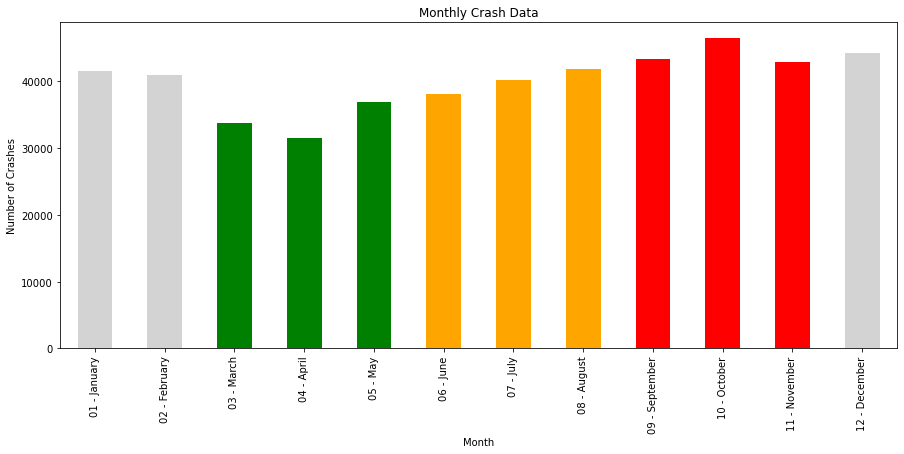

In [45]:
# Graph of Monthly Changes
crash_month_data = crash_data.groupby('CRASH_MONTH')['CRASH_RECORD_ID'].describe()
crash_month_data['count'].plot(title='Monthly Crash Data', kind='bar', xlabel='Month', ylabel = 'Number of Crashes', color=['lightgrey','lightgrey','green','green','green','orange','orange','orange','red','red','red','lightgrey'], figsize = (15,6))

<AxesSubplot:title={'center':'Seasonal Crash Data'}, xlabel='Season', ylabel='Number of Crashes'>

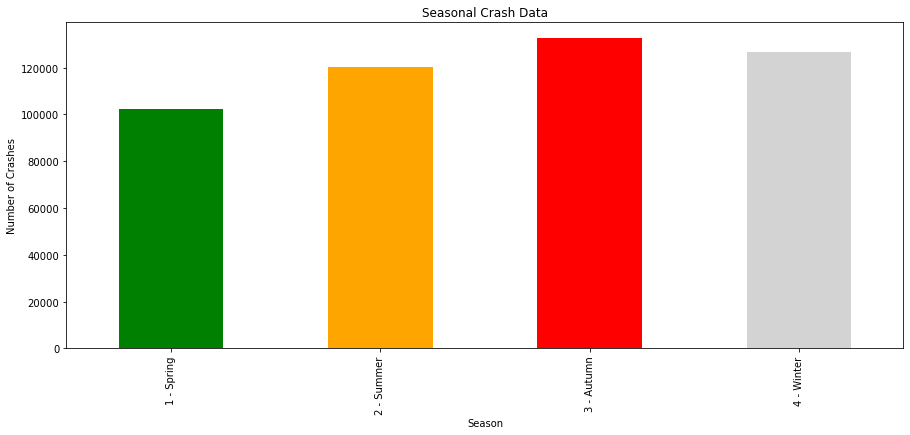

In [46]:
# Graph of Seasonal Changes
crash_season_data = crash_data.groupby('CRASH_SEASON')['CRASH_RECORD_ID'].describe()
crash_season_data['count'].plot(title='Seasonal Crash Data', kind='bar', xlabel='Season', ylabel = 'Number of Crashes', color=['green','orange','red','lightgrey'], figsize = (15,6))

#### Day of the Week Changes

This graph takes a look at the crash data by day of the week.

According to the data, the majority of crashes occur on Fridays at a significantly higher value that the rest, while Sunday features the least number of crashes.

<AxesSubplot:title={'center':'Crash Data By Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Crashes'>

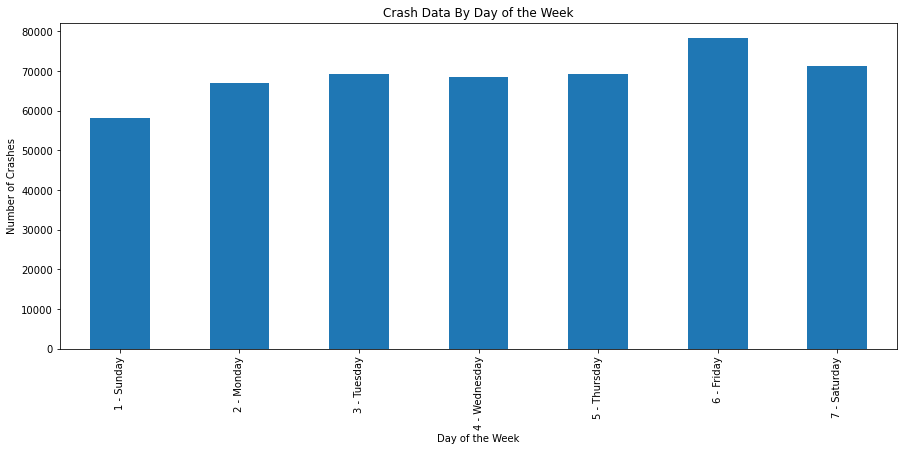

In [47]:
# Graph of Day of the Week Changes
crash_day_of_week_data = crash_data.groupby('CRASH_DAY_OF_WEEK')['CRASH_RECORD_ID'].describe()
crash_day_of_week_data['count'].plot(title='Crash Data By Day of the Week', kind='bar', xlabel='Day of the Week', ylabel = 'Number of Crashes', figsize = (15,6))

#### Hourly Changes and Day and Night Changes

This graph takes a look at the crash data by hour.

According to the data, crashes start rising from the low point of 4 AM with a smaller peak at 8 AM. The number of crashes then slightly drops at 9 and 10 AM, before rising to peak at around 3-6 PM. Afterwards, the number of crashes goes down as the night goes on until 4 AM when it resets. We can also see that the majority of crashes occur in the day rather than the night, with approximately 72% of crashes occurring during the day. The graph has been color coded according to day or night.

<AxesSubplot:title={'center':'Crash Data by Hour'}, xlabel='Hour of the Day', ylabel='Number of Crashes'>

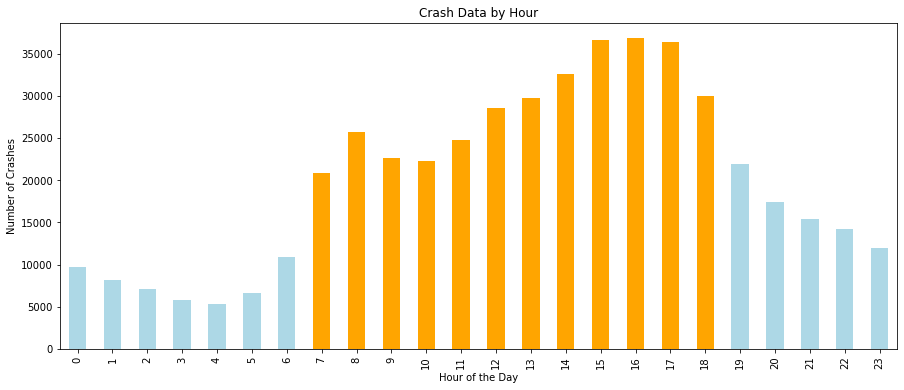

In [48]:
# Graph of Hourly Changes
crash_hour_data = crash_data.groupby('CRASH_HOUR')['CRASH_RECORD_ID'].describe()
crash_hour_data['count'].plot(title='Crash Data by Hour', kind='bar', xlabel='Hour of the Day', ylabel = 'Number of Crashes', color=['lightblue','lightblue','lightblue','lightblue', 'lightblue','lightblue','lightblue','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','lightblue','lightblue','lightblue', 'lightblue','lightblue'], figsize = (15,6))

<AxesSubplot:title={'center':'Crash Data by Time of Day'}>

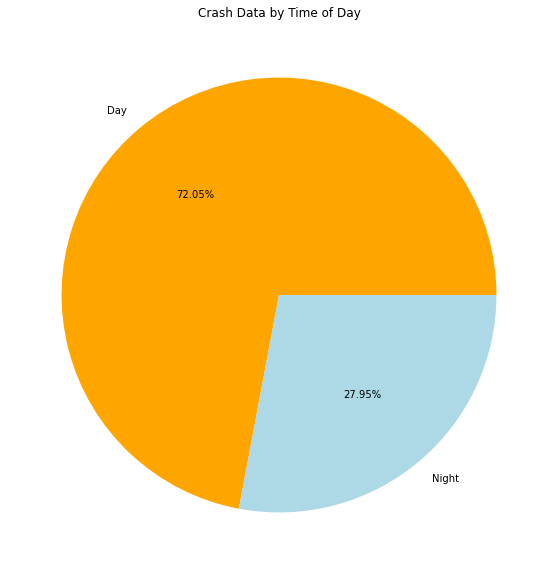

In [50]:
# Graph of Day or Night
crash_day_night_data = crash_data.groupby('DAY_OR_NIGHT')['CRASH_RECORD_ID'].describe()
crash_day_night_data['count'].plot.pie(autopct = '%.2f%%', title='Crash Data by Time of Day', ylabel = '', colors = ['orange', 'lightblue'], figsize = (10,10))

#### Changes by Weather

This graph shows the changes of crashes by weather. As we can see, the majority of crashes occur during clear weather conditions, which is primarily due to the majority of days being clear weather conditions. The next most common are rain and snow, with a considerable number of crashes having unknown conditions.

<AxesSubplot:title={'center':'Crash Data by Weather'}, xlabel='Day of the Week', ylabel='Number of Crashes'>

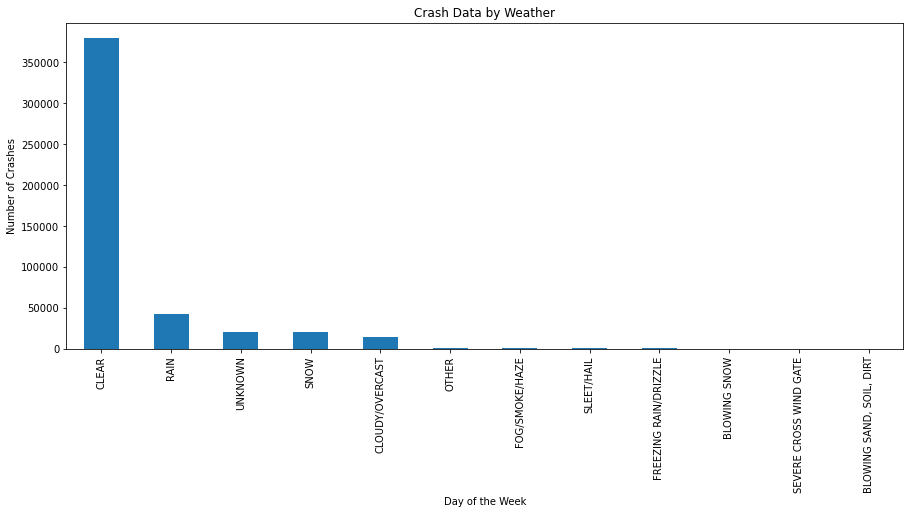

In [51]:
# Graph of Crash Data by Weather Changes
crash_weather_data = crash_data.groupby('WEATHER_CONDITION')['CRASH_RECORD_ID'].describe()
crash_weather_data['count'].sort_values(ascending=False).plot(title='Crash Data by Weather', kind='bar', xlabel='Day of the Week', ylabel = 'Number of Crashes', figsize = (15,6))

#### Changes by Lighting Conditions

This graph showcases the crash data by lighting conditions. The majority of crashes occur in the daylight, while approximately a third of this amount occurring in the dark with a lighted road. A much smaller number of crashes occurs in darkness, at dusk, and at dawn, with a similar amount to these having unknown conditions.

<AxesSubplot:title={'center':'Crash Data by Lighting Conditions'}, xlabel='Day of the Week', ylabel='Number of Crashes'>

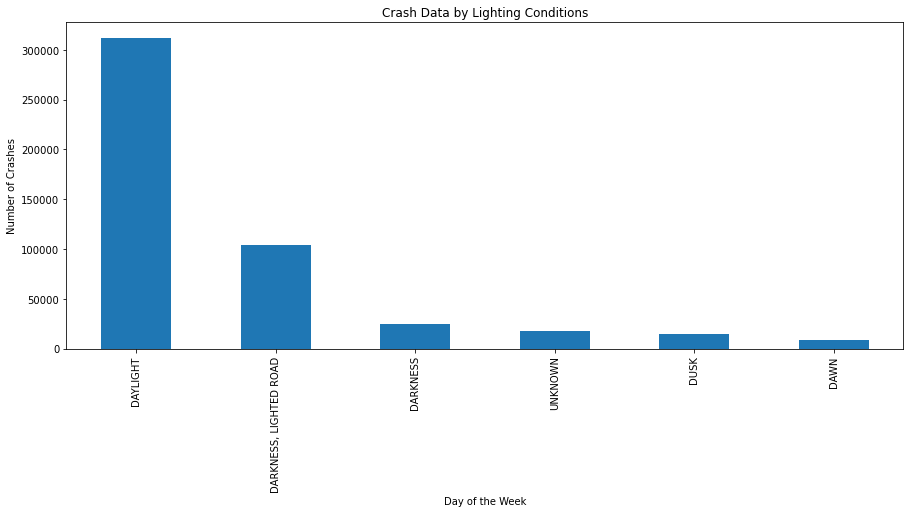

In [52]:
# Graph of Crash Data by Lighting Conditions
crash_lighting_data = crash_data.groupby('LIGHTING_CONDITION')['CRASH_RECORD_ID'].describe()
crash_lighting_data['count'].sort_values(ascending=False).plot(title='Crash Data by Lighting Conditions', kind='bar', xlabel='Day of the Week', ylabel = 'Number of Crashes', figsize = (15,6))

#### Analysis

From the graphs above, we can see that the majority of crashes occur during the active hours of most days. Friday and Saturday during the afternoon are prime times for crashes to occur. Crashes are also the most common during the autumn season with winter and summer not too far behind. Weather and lighting conditions can be contributing factors to crashes, but we can see it does not play as major of a role as the time of day, which is seen as much more significant in crash occurences based upon this data.

Possible explanations for these results can be attributed by activity of people in the city. When looking at rush hour traffic for the Chicago region, traffic is the highest in between the hours of 7 AM to 9 AM and 3 PM to 7 PM. From our graph of hourly changes, this is similarly reflected by both sets of time containing peaks within their data. Past research has also determined that Fridays between the hours of 4 PM to 5 PM are the most heavy. The day of the week graph also demonstrates this, along with the hourly changes graph, with both Friday and 4 PM to 5 PM being the most common values for crashes in our data. 

Additional source regarding rush hour information:

https://www.gerbercollision.com/articles/surviving-rush-hour-in-chicago#:~:text=According%20to%20data%20captured%20by,7%20p.m%20in%20the%20evening.

## Part 4 - Crash Frequency Insights

#### Description
In this section, we will take a look at the change of the frequency of crashes over the years. Because the information that we have is incomplete as some years are missing many instances of crashes and the most recent year collected of 2021 only contains two months on record, we need to break this information down further. The graph below was created by breaking down the elements of the year and the month, showing that the crash rate which started being tracked primarily around July/August of 2015 has rose considerably up until the end of 2017, where it remained stagnant until the start of 2020 where it makes a drastic decrease during the months of March and April.

<AxesSubplot:title={'center':'Crash Frequency by Month Over Years'}, xlabel='(Year, Month)', ylabel='Number of Crashes'>

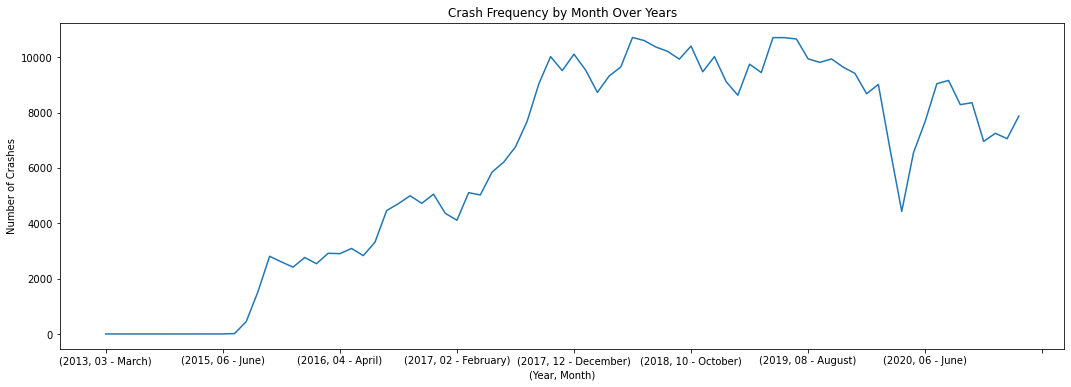

In [53]:
# Graph of Crash Frequency by Month over Years
crash_year_data = crash_data.groupby(['CRASH_YEAR', 'CRASH_MONTH'])['CRASH_RECORD_ID'].describe()
crash_year_data['count'].plot(title='Crash Frequency by Month Over Years', kind='line', xlabel='(Year, Month)', ylabel = 'Number of Crashes', figsize = (18,6))

This next graph breaks down the above graph even further, having crash data by an additional metric of day. Notice that the decrease can also be seen here in March. The exact date of the significant drop is on March 17th, 2020, where it dropped from 282 crashes in a day on March 16th, to 185 in a day on March 17th. This can be seen on the top two data entries below by count.

                                   count unique  \
CRASH_YEAR CRASH_MONTH   CRASH_DAY                
2020       03 - March    16          282    282   
                         17          185    185   
                         18          166    166   
                         19          164    164   
                         20          199    199   
...                                  ...    ...   
2021       02 - February 24          212    212   
                         25          209    209   
                         26          232    232   
                         27          189    189   
                         28            2      2   

                                                                                  top  \
CRASH_YEAR CRASH_MONTH   CRASH_DAY                                                      
2020       03 - March    16         449c57174e0468f00a76a3845102a0fc0522144b03dd70...   
                         17         4d76404ca34e1e12246bdd7d06bdddbc7

<AxesSubplot:title={'center':'Crash Frequency by Day over Years'}, xlabel='(Year, Month, Day)', ylabel='Number of Crashes'>

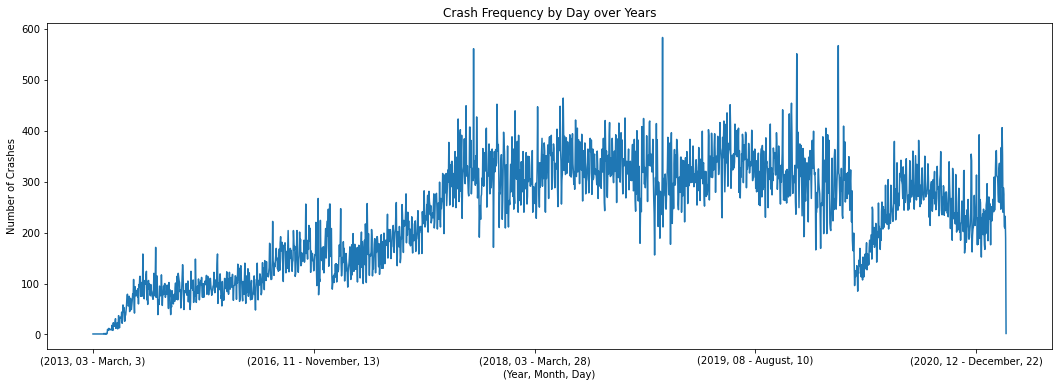

In [54]:
# Graph of Crash Frequency by Days over Years
crash_year_data = crash_data.groupby(['CRASH_YEAR', 'CRASH_MONTH', 'CRASH_DAY'])['CRASH_RECORD_ID'].describe()
print(crash_year_data.tail(350))
crash_year_data['count'].plot(title='Crash Frequency by Day over Years', kind='line', xlabel='(Year, Month, Day)', ylabel = 'Number of Crashes', figsize = (18,6))

#### Analysis

The graphs above showcase a general trend for amount of crashes in the Chicagoland area as slowly increasing up until a sudden drop where we can see an exact date of March 17th, 2020 where a large downwards spike occured in the number of crashes. When looking up information as to what had occurred on the date, we can see that COVID-19 cases had started appearing in Illinois in larger numbers of approximately 46 total cases on March 16th, resulting in Governor Pritzker to announce statewide closures around these dates, including statewide school closures on March 17th, and a public health order on March 18th urging citizens to stay at home if they are sick and to only seek medical care if necessary. COVID-19 is definitely a defining factor for this decline of crashes that can be seen on the graph. We can also see a smaller decline in November of 2021, which is when Illinois reinstated the stay at home order due to a second spike in COVID-19 cases. These graphs demonstrate the impact of COVID-19 on activity in the Chicagoland area, with crash rates decreasing as fewer people traveled due to the dangerous virus.

Additional sources regarding COVID-19 information in Illinois: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Illinois#:~:text=On%20March%2013%2C%20fourteen%20new,days%20beginning%20on%20March%2016.

https://www.chicago.gov/city/en/sites/covid-19/home/health-orders.html

## Part 5 - Effects of Speed Limit and Types of Injuries

#### Description

This first graph sets up what speed limit causes the most crashes in Chicago. We can see that the majority of crahes occur between the 21-30 mph range of speed limits, making up approximately 80% of crashes. 31-40 mph and 11-20 mph are the next most common ranking in at about 7-8%. About 4% of crashes are around 0-10 mph, and very few crashes being above 41 mph.

<AxesSubplot:title={'center':'Crash Data by Speed Limit'}>

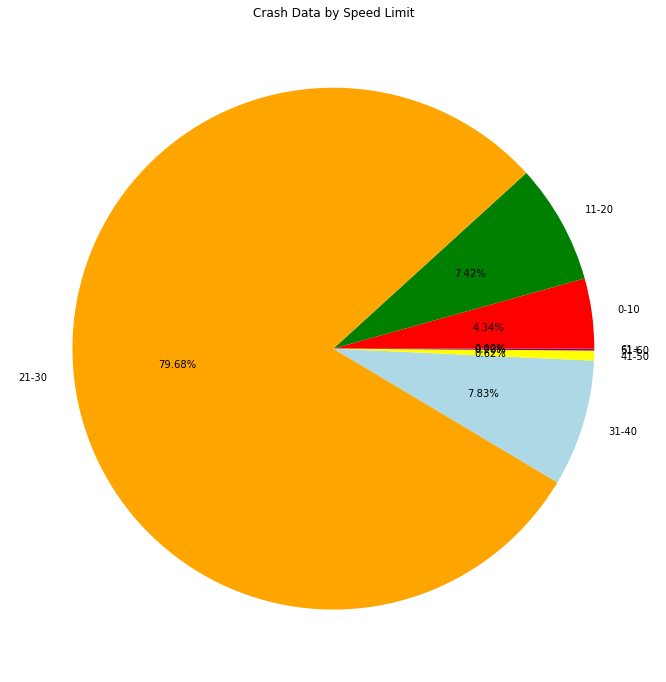

In [55]:
# Graph of Crash Frequency by speed limit ranges
crash_data_speed_limit = crash_data.groupby('POSTED_SPEED_LIMIT')['CRASH_RECORD_ID'].describe()
crash_data_speed_limit['count'].plot.pie(autopct = '%.2f%%', title='Crash Data by Speed Limit', ylabel = '', colors = ['red', 'green', 'orange','lightblue','yellow','purple','brown','white'], figsize = (12,12))

This graph demonstrates the relationship between speed limit and the types of injuries. From the graph, we can see that the vast majority of crashes occur at speeds between 21-30 mph. This includes all aspects of injury types, from fatal, incapacitating, non-incapacitating, and reported not evident. We can also see that the majority of injuries for all speeds are primarily non-incapacitating, with reported not evident injuries being the next most common, followed by incapacitating. Fatal injuries are the least common with a small amount of crashes being fatal.

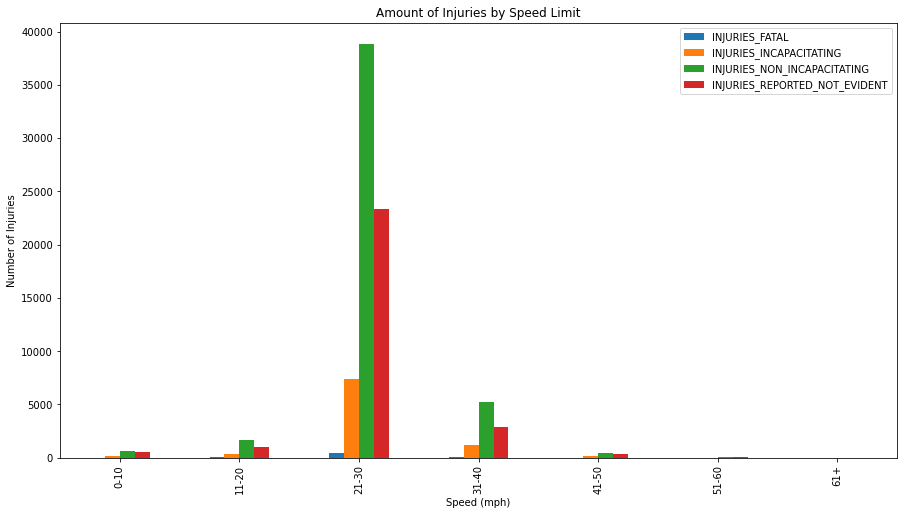

In [56]:
# Graph of Injuries by Speed Limit
crash_speed_limit_injuries_data = crash_data.groupby('POSTED_SPEED_LIMIT')[['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT']].sum().plot(title='Amount of Injuries by Speed Limit', kind='bar', figsize = (15,8), xlabel='Speed (mph)', ylabel = 'Number of Injuries')

#### Analysis

The majority of crashes occur in between 21-30 mph in Chicago. This can be understood by the law indicating that 30 mph is the maximum speed limit in urban areas unless otherwise specified. With Chicago being urban, the city also matches this maximum speed limit threshold. Because of this massive majority of speed limits being around this range, the most injuries also occur in the speed limit range here as well for all types of injuries.

Information on speed limits retrieved from the following link:

https://www.isp.illinois.gov/TrafficSafety/SpeedLimitEnforcement

## Part 6 - Hit and Run Crashes and Fatal Injuries

#### Description
The next two graphs showcase hit and run crashes and their relations to fatal injuries. We can see that out of approximately 500 fatal injuries that have occured in the Chicago crash dataset, around 16% of the crashes have resulted in a hit and run incident. The remaining 84% of injuries did not result in a hit and run.  

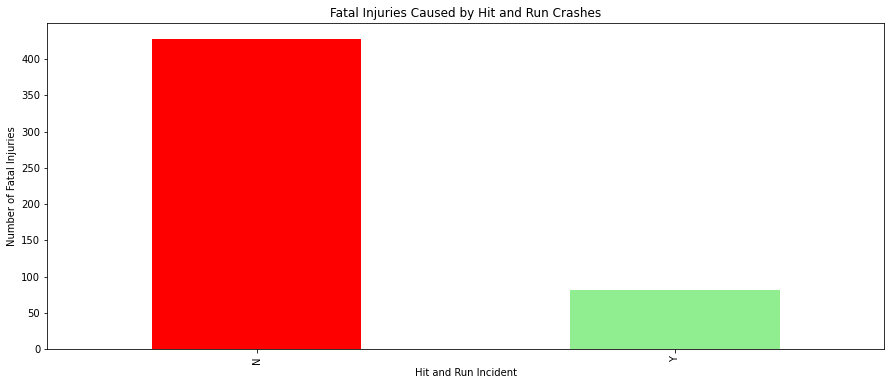

In [58]:
# Graph of Number of Fatal Injuries caused by Hit and Run Crashes
crash_data_hit_and_run_data = crash_data.groupby('HIT_AND_RUN')['INJURIES_FATAL'].sum().plot(title='Fatal Injuries Caused by Hit and Run Crashes', kind='bar', figsize = (15,6), xlabel='Hit and Run Incident', ylabel = 'Number of Fatal Injuries', color = ['red', 'lightgreen'])

<AxesSubplot:title={'center':'Hit and Run Fatal Injuries by Percentage'}>

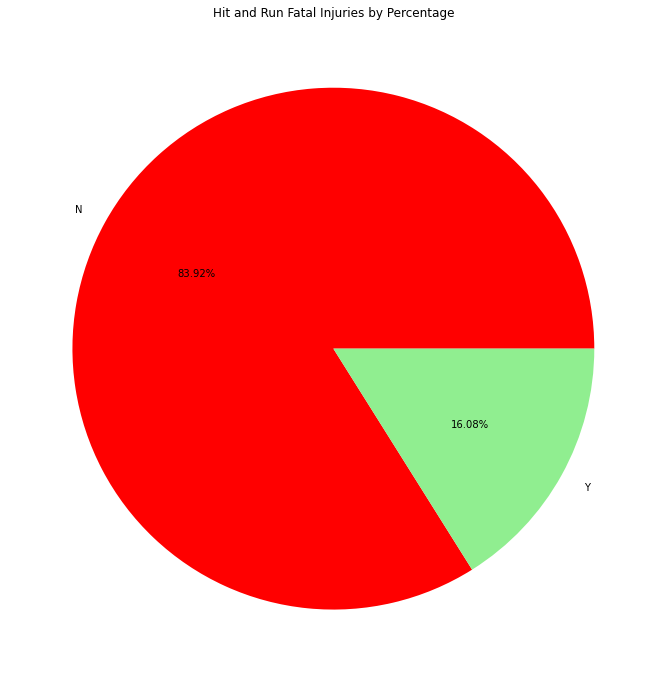

In [59]:
# Graph of Percentage of Fatal Injuries caused by Hit and Run Crashes
crash_data_hit_and_run = crash_data.groupby('HIT_AND_RUN')['INJURIES_FATAL'].sum()
crash_data_hit_and_run.plot.pie(autopct = '%.2f%%', title='Hit and Run Fatal Injuries by Percentage', ylabel = '', colors = ['red', 'lightgreen'], figsize = (12,12))

## Part 7 - Intersection Related Fatal Injuries

#### Description
The next two graphs showcase intersection related crashes and their relations to fatal injuries. Out of approximately 500 fatal injuries that have been recorded in the Chicago dataset, about 33% of fatalities resulted from intersection related crashes. The remaining 67% of fatalities were not the result of an intersection related crash.

<AxesSubplot:title={'center':'Fatal Injuries Caused by Intersection Related Crashes'}, xlabel='Intersection Related Injury', ylabel='Number of Fatal Injuries'>

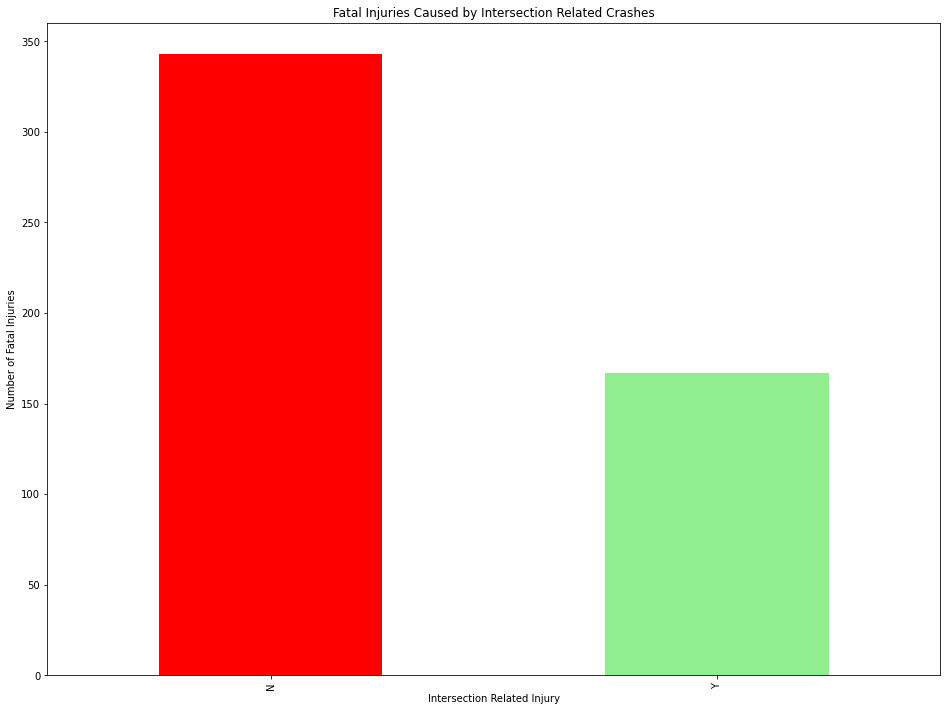

In [60]:
# Graph of Number of Fatal Injuries caused by Intersection Related Crashes
crash_data.groupby('INTERSECTION_RELATED')['INJURIES_FATAL'].sum().plot(title='Fatal Injuries Caused by Intersection Related Crashes', kind='bar', figsize = (16,12), xlabel='Intersection Related Injury', ylabel = 'Number of Fatal Injuries', color = ['red', 'lightgreen'])

<AxesSubplot:title={'center':'Intersection Related Fatalities by Percentage'}>

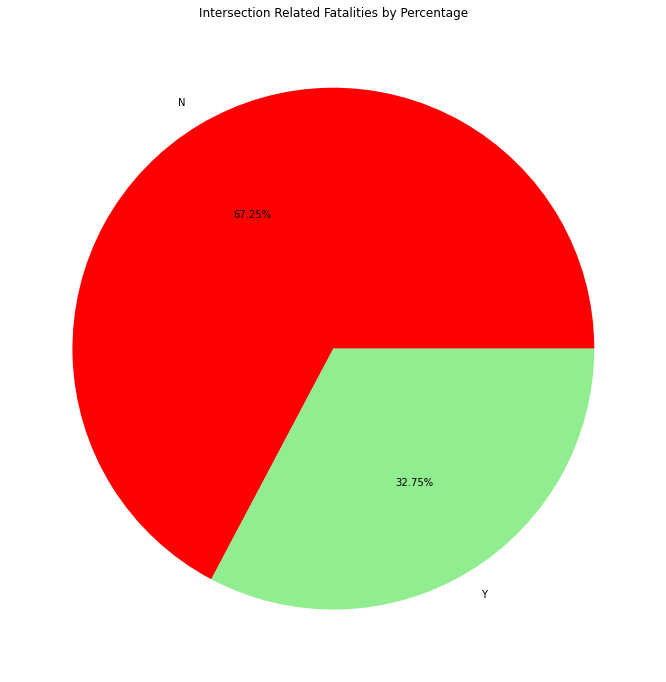

In [61]:
# Graph of Percentage of Fatal Injuries caused by Intersection Related Crashes
crash_data_intersection = crash_data.groupby('INTERSECTION_RELATED')['INJURIES_FATAL'].sum()
crash_data_intersection.plot.pie(autopct = '%.2f%%', title='Intersection Related Fatalities by Percentage', ylabel = '', colors = ['red', 'lightgreen'], figsize = (12,12))

#### Analysis of Part 6 and Part 7

From the sets of graphs above, we can see that fatal injuries were more prevalent in intersection related crashes, being the result of at about 33% of crashes in comparison to hit and run incidents at 16%, or about half of the number of fatalities. This makes sense as intersections are regarded as the most dangerous parts of driving, due to intersection related crashes being often times side-impact crashes, which often result in serious injury since the side of a vehicle is not as protected for passengers or drivers in comparison to the front or the rear. 

Additional information on intersection related crashes here:

https://www.hlmlawfirm.com/blog/why-intersections-are-at-the-root-of-so-many-collisions/

## Part 8a - Primary Contributing Cause of Crashes

#### Description
This graph takes a look at the primary cause of crashes in the dataset. From the graph, we can see that the majority of crashes have an inability to be determined, primarily due to the nature of crashes potentially having multiple reasons or conflicting reasons for their occurrences. However, we can see that the most common cause of crashes that have a determinable value are the result of failing to yield to the right-of-way or by following too closely, both making up approximately fifty thousand crashes each.

<AxesSubplot:title={'center':'Crash Data by Primary Contributing Cause'}, xlabel='Contributing Cause', ylabel='Number of Crashes'>

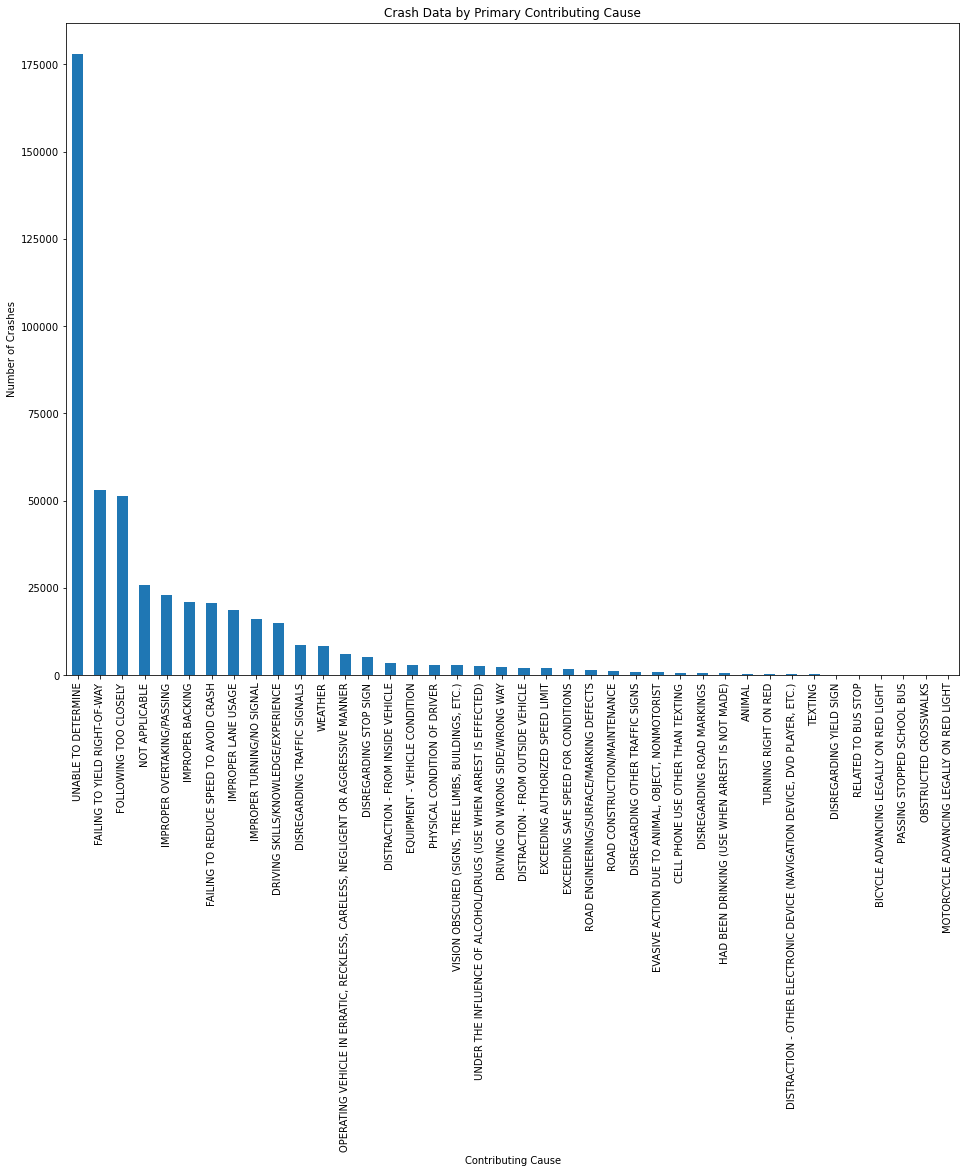

In [62]:
# Graph of primary contributing cause of crashes
crash_data_cause = crash_data.groupby('PRIM_CONTRIBUTORY_CAUSE')['CRASH_RECORD_ID'].describe()
crash_data_cause['count'].sort_values(ascending=False).plot(title='Crash Data by Primary Contributing Cause', kind='bar', xlabel='Contributing Cause', ylabel = 'Number of Crashes', figsize = (16,12))

## Part 8b - Most Common Crash Types

#### Description
The graph below takes a look into the most common crash occurences in the Chicago dataset. According to this information, the majority of crashes that have occurred are due to a result of rear end crashes, followed closely by crashes involving a parked motor vehicle. The next most common crashes are due to side swipes at the same direction and by turning related incidents.

<AxesSubplot:title={'center':'Crash Data by Primary Contributing Cause'}, xlabel='Contributing Cause', ylabel='Number of Crashes'>

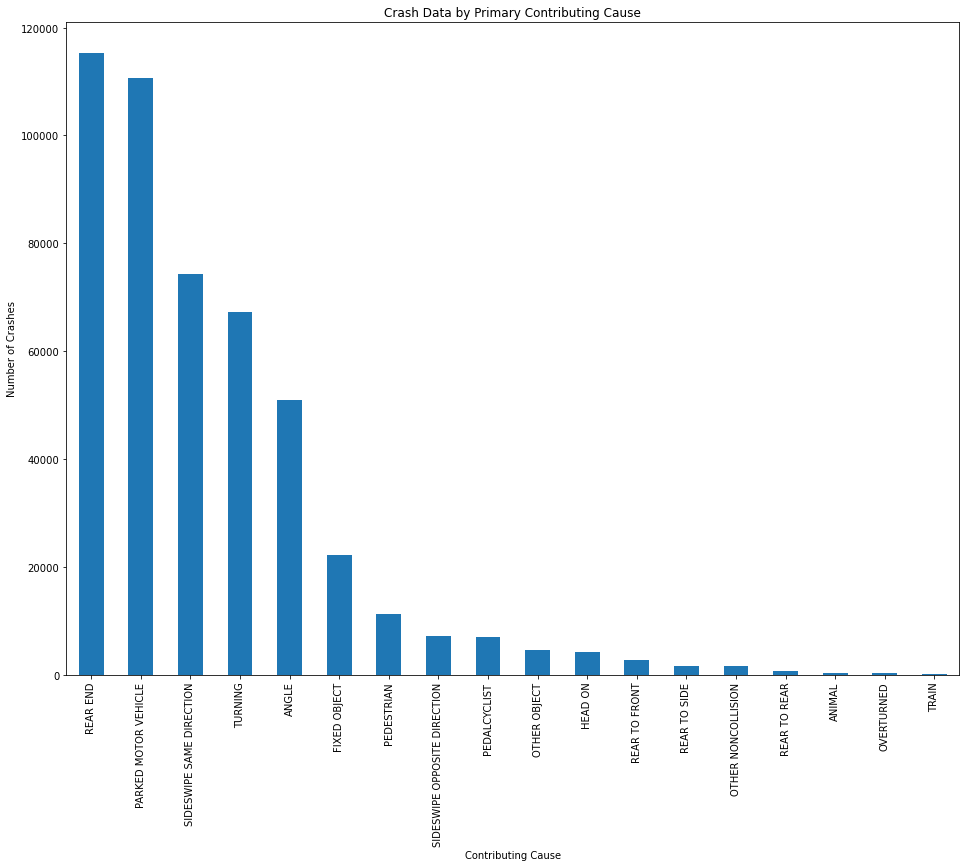

In [64]:
# Graph of most common crash types
crash_data_type = crash_data.groupby('FIRST_CRASH_TYPE')['CRASH_RECORD_ID'].describe()
crash_data_type['count'].sort_values(ascending=False).plot(title='Crash Data by Primary Contributing Cause', kind='bar', xlabel='Contributing Cause', ylabel = 'Number of Crashes', figsize = (16,12))

## Part 8c - Crash Data by Damage Costs

#### Description
This graph gives us insights on the damage costs of crashes. According to the graph, the majority of crashes that have occured resulted in over 1500 dollars of damages, making up 58 percent of the crashes. Crashes resulted in 501-1500 dollars of damages in 29 percent of crashes, and 13 percent of crashes ended up with less than 500 dollars of crashes.

<AxesSubplot:title={'center':'Percentage of Crash Data by Cost'}>

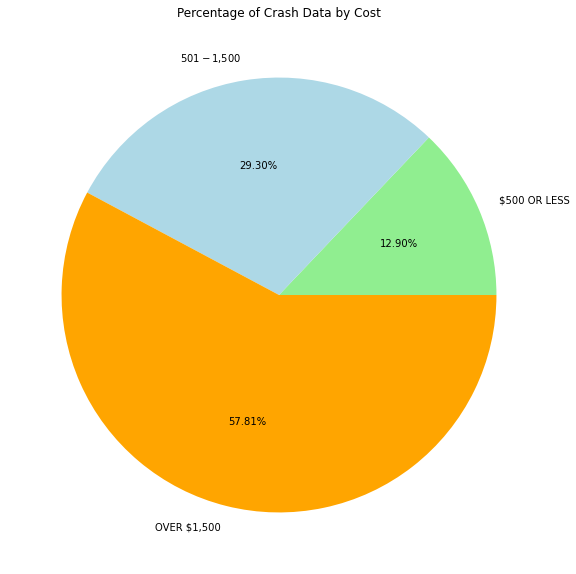

In [63]:
# Graph of Crash Data by Damage Costs
crash_cost_data = crash_data.groupby('DAMAGE')['CRASH_RECORD_ID'].describe()
crash_cost_data['count'].plot.pie(autopct = '%.2f%%', title='Percentage of Crash Data by Cost', ylabel = '', colors = ['lightgreen', 'lightblue','orange'], figsize = (10,10))